## Load essential packages for exploratory data analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

## Extracting data from the UCI repository. 

In [2]:
# Install the ucimlrepo package (run this in your terminal, not in the script)
# !pip install ucimlrepo  # Uncomment this line to install if necessary

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# variable information 
print(glass_identification.variables) 

             name     role         type demographic       description  \
0       Id_number       ID      Integer        None              None   
1              RI  Feature   Continuous        None  refractive index   
2              Na  Feature   Continuous        None            Sodium   
3              Mg  Feature   Continuous        None         Magnesium   
4              Al  Feature   Continuous        None          Aluminum   
5              Si  Feature   Continuous        None           Silicon   
6               K  Feature   Continuous        None         Potassium   
7              Ca  Feature   Continuous        None           Calcium   
8              Ba  Feature   Continuous        None            Barium   
9              Fe  Feature   Continuous        None              Iron   
10  Type_of_glass   Target  Categorical        None              None   

                                    units missing_values  
0                                    None             no  
1    

## Combine features and targets into a single DataFrame

In [4]:
df = pd.concat([X, pd.Series(y.squeeze(), name="Class")], axis=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Check for missing and duplicated values

In [5]:
print("Missing values per column:\n", df.isnull().sum())
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Missing values per column:
 RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64
Number of duplicated rows: 1


In [6]:
# Remove duplicates in place
df.drop_duplicates(inplace=True)

# Re-check for missing and duplicated values after removal
print("After removing duplicates:")
print("Missing values per column:\n", df.isnull().sum())
print(f"Number of duplicated rows: {df.duplicated().sum()}")
print(f"Shape of the DataFrame after cleaning: {df.shape}")

After removing duplicates:
Missing values per column:
 RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64
Number of duplicated rows: 0
Shape of the DataFrame after cleaning: (213, 10)


## Display dataset information and statistical summary

In [7]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Class   213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


### Statistical summary provides insights into position, dispersion, and shape of the data

In [8]:
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Check the class distribution

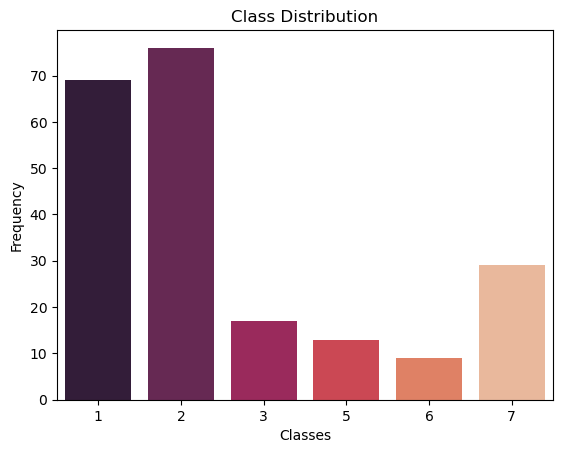

In [9]:
#sns.countplot(x="Tipo", data=df, palette="rocket")

sns.countplot(x="Class", data=df, palette="rocket")
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

## Data visualization

#### Here we can have a sight of the data distribution in a more insightful manner.
#### It is possible to show only a few features instead of the whole dataset. For this, I used the following code.

## 1) PairPlots

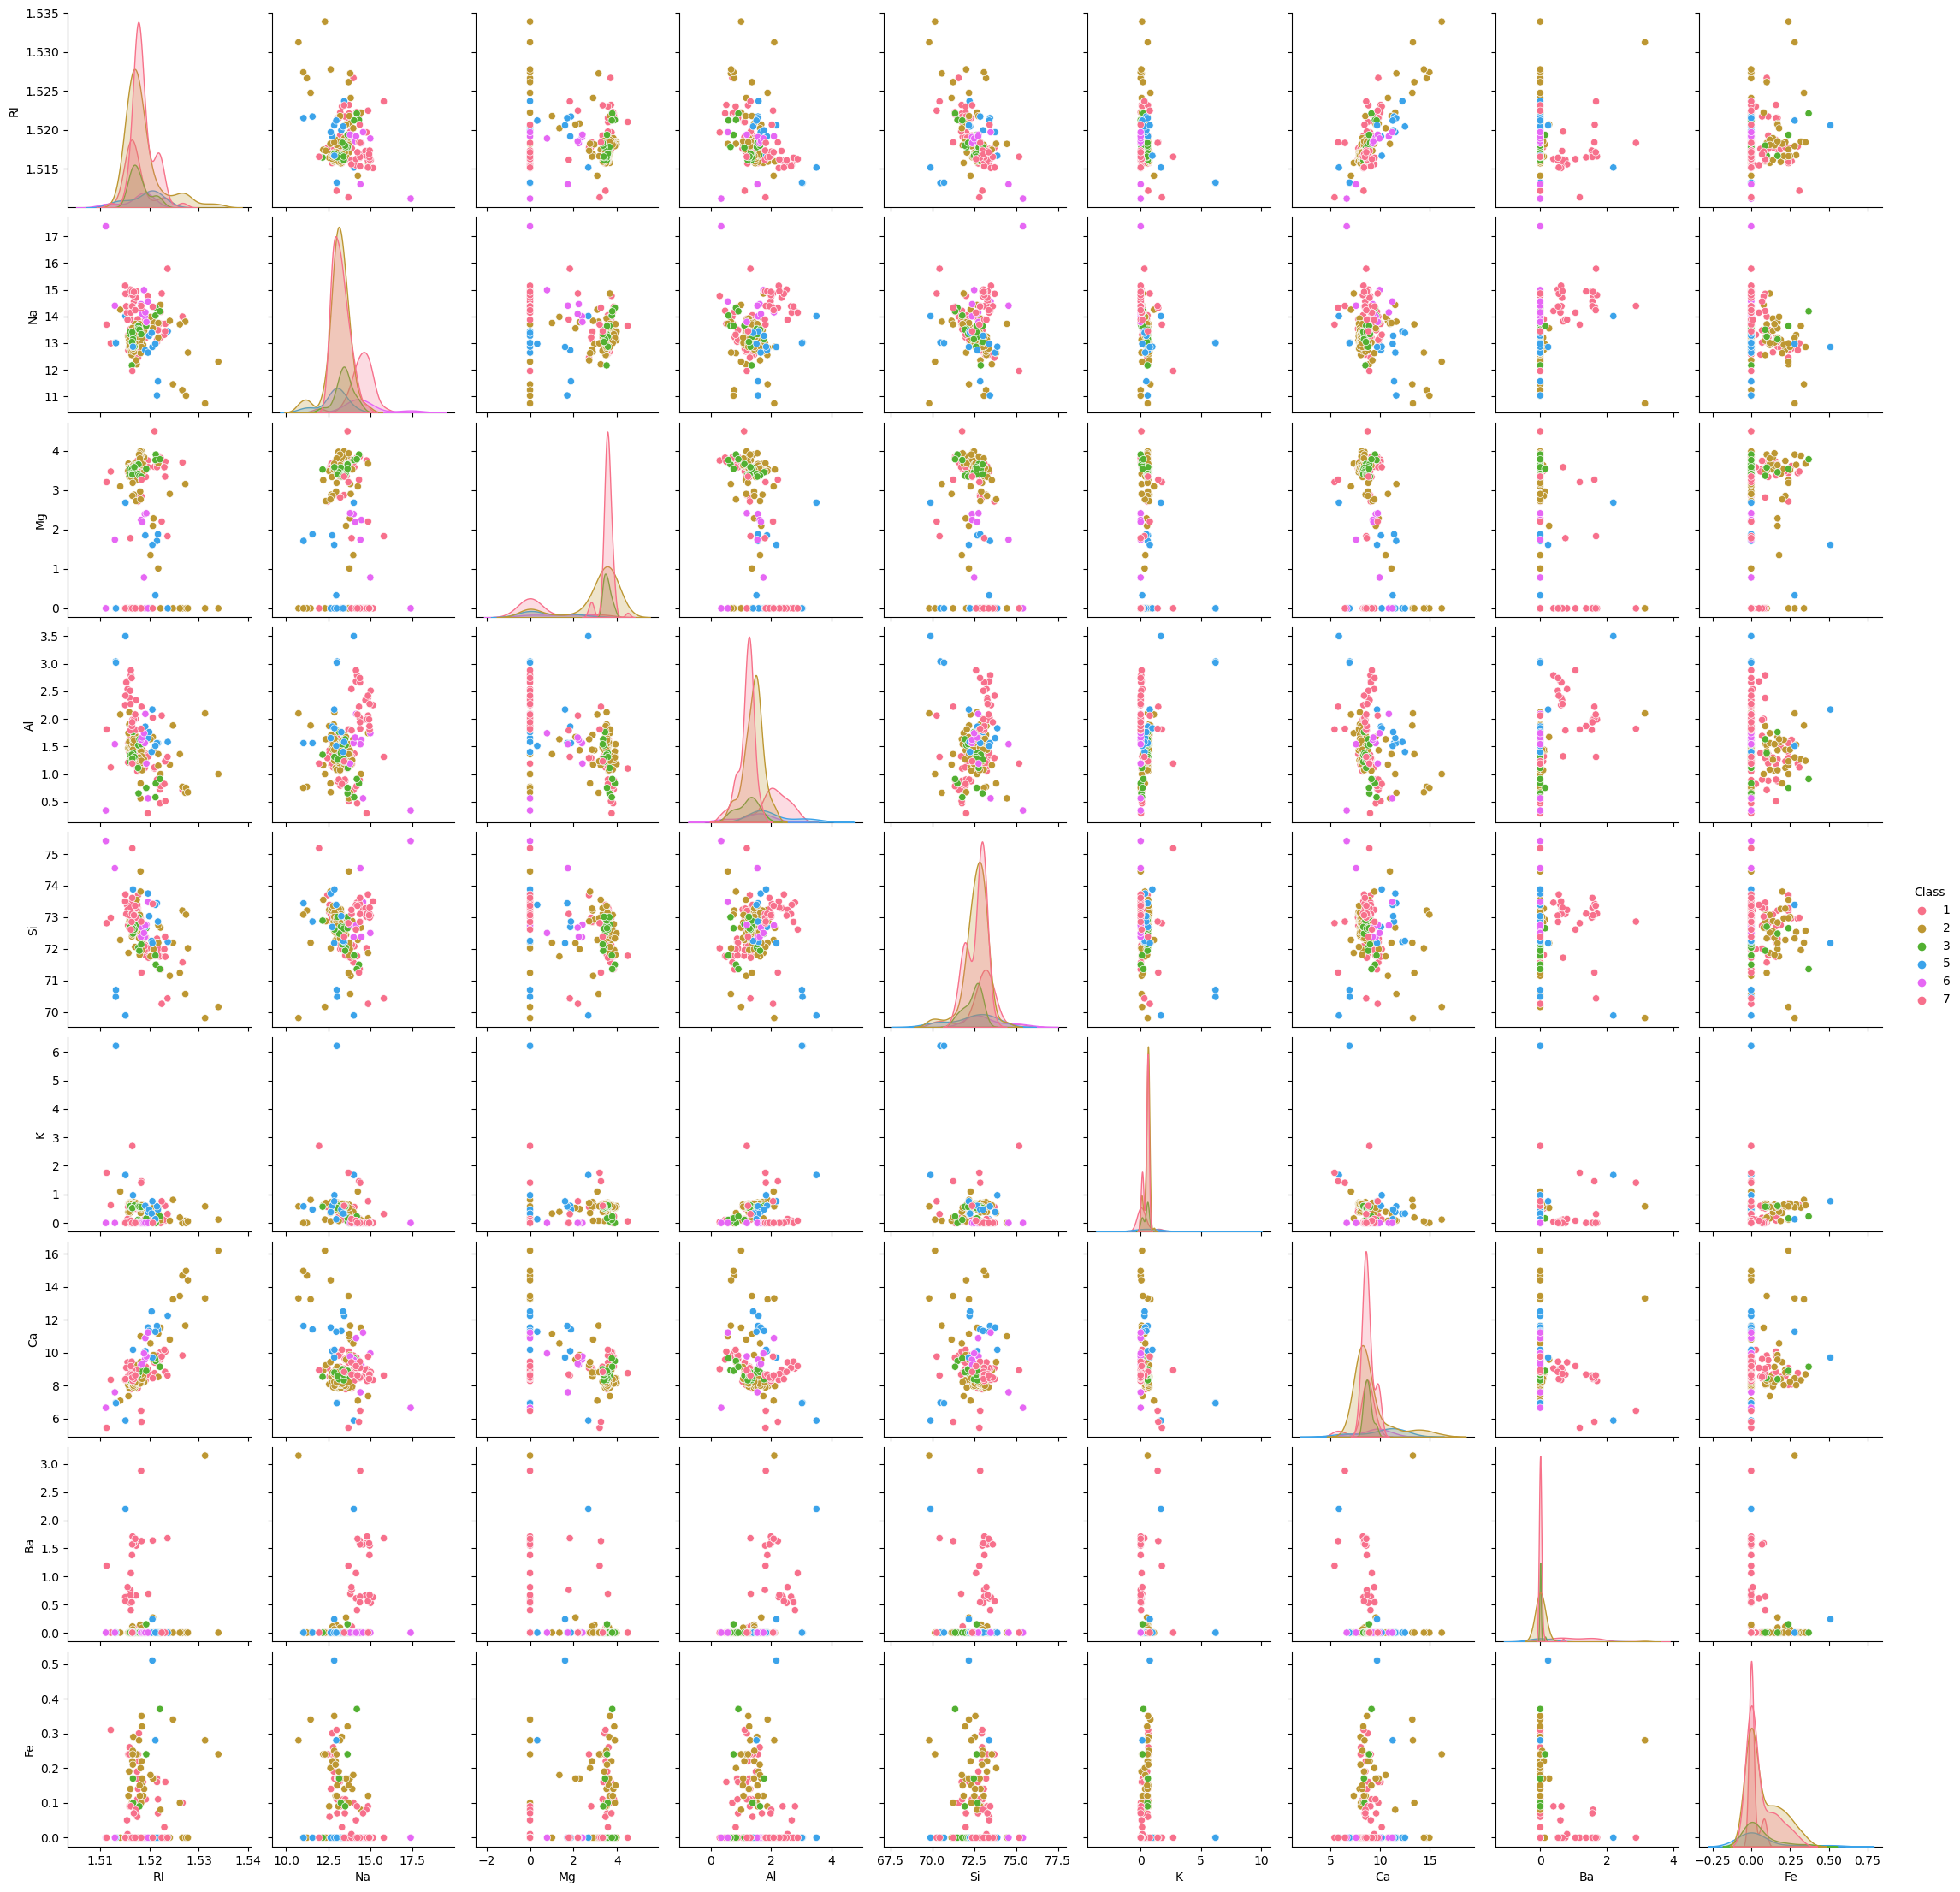

In [10]:
sns.pairplot(df, hue = "Class", palette = "husl")

### with the following commented code I generate the pairplot graphs just for RI, Na, Fe and Class (you can try)
# sns.pairplot(df[["RI", "Na", "Fe", "Class"]], hue = "Class", palette = "husl");
# plt.show()

## 2) Histograms

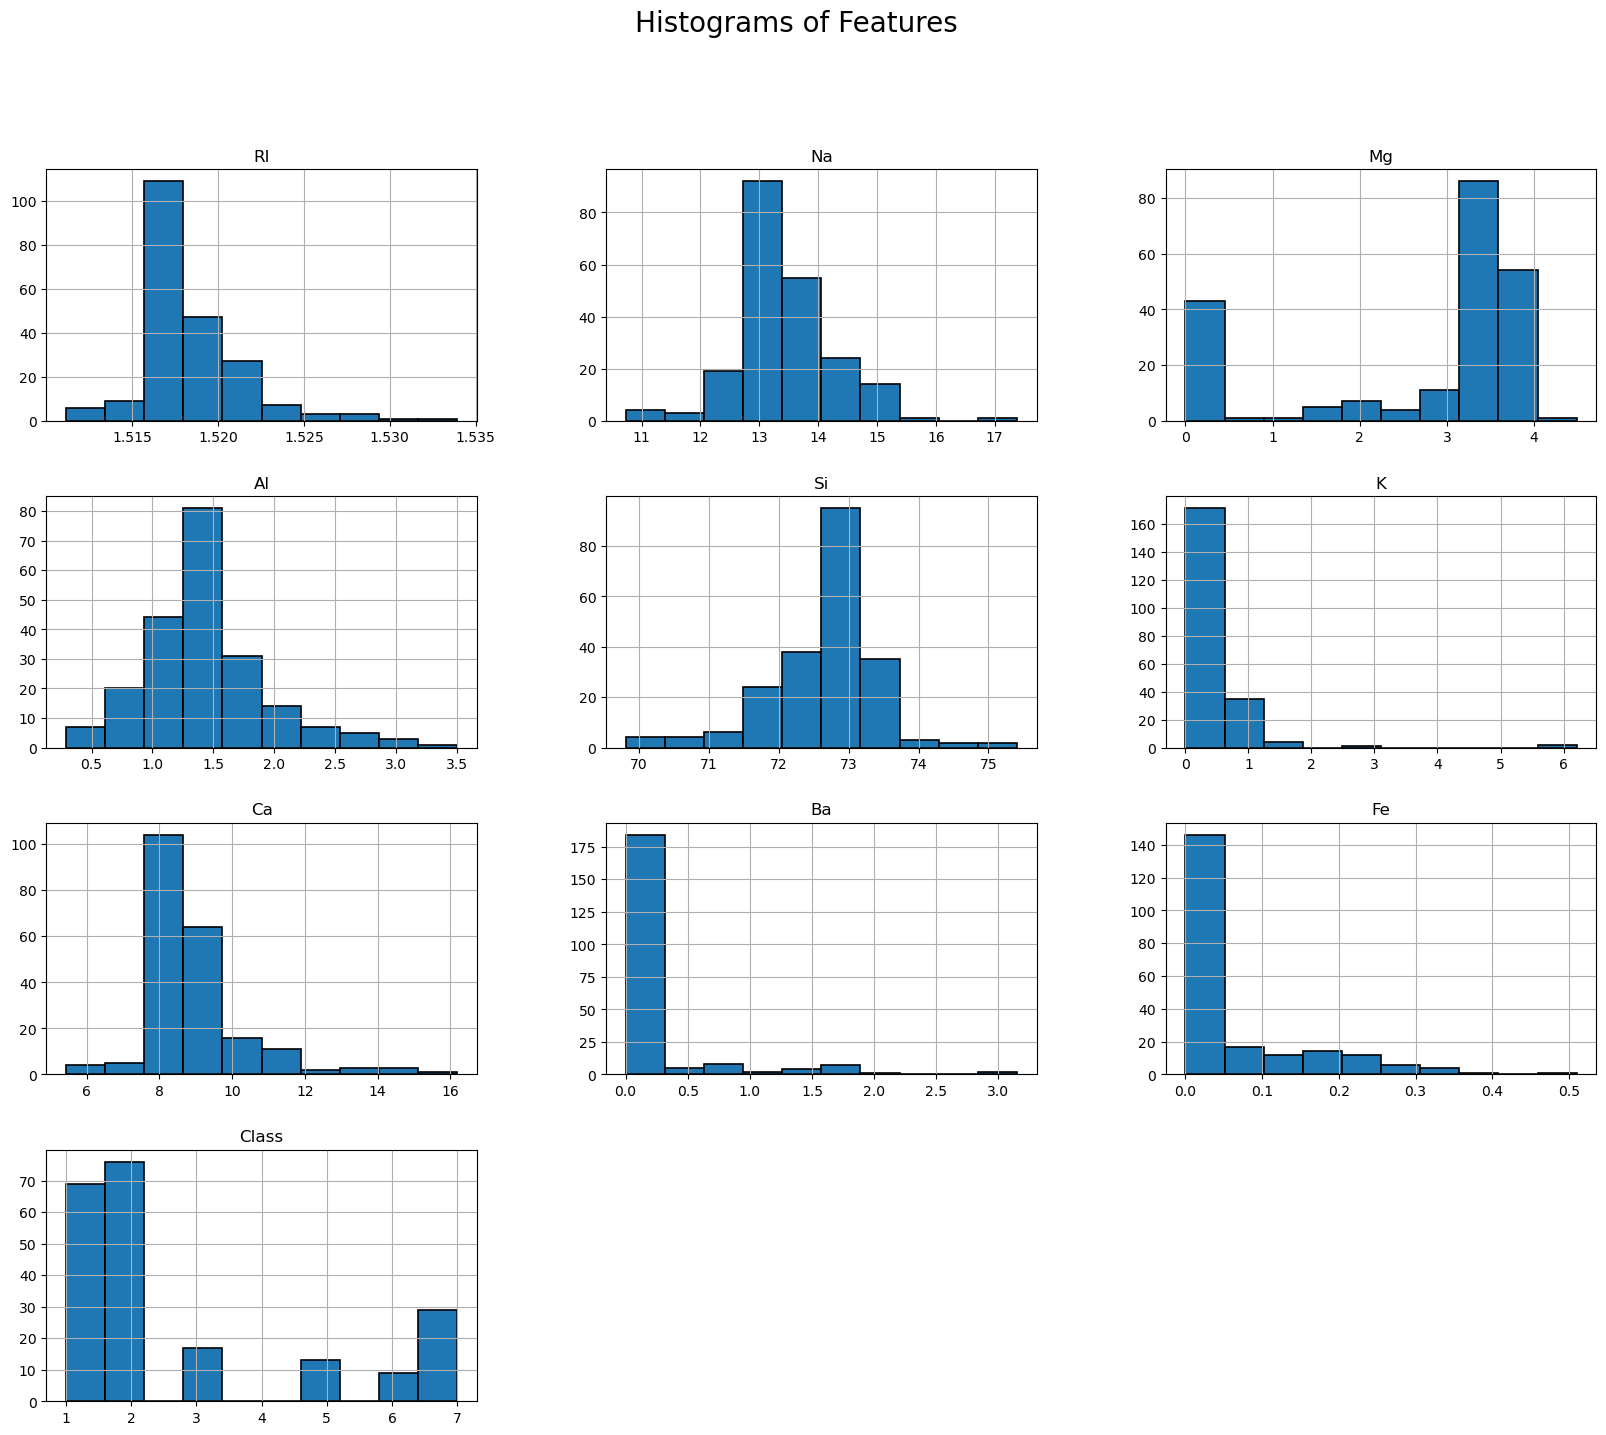

In [11]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20,16));
plt.suptitle('Histograms of Features', fontsize=20)
plt.show()

## 3) Violin Plots

#### Here, I just plot some of the features but feel free to include the remaining features

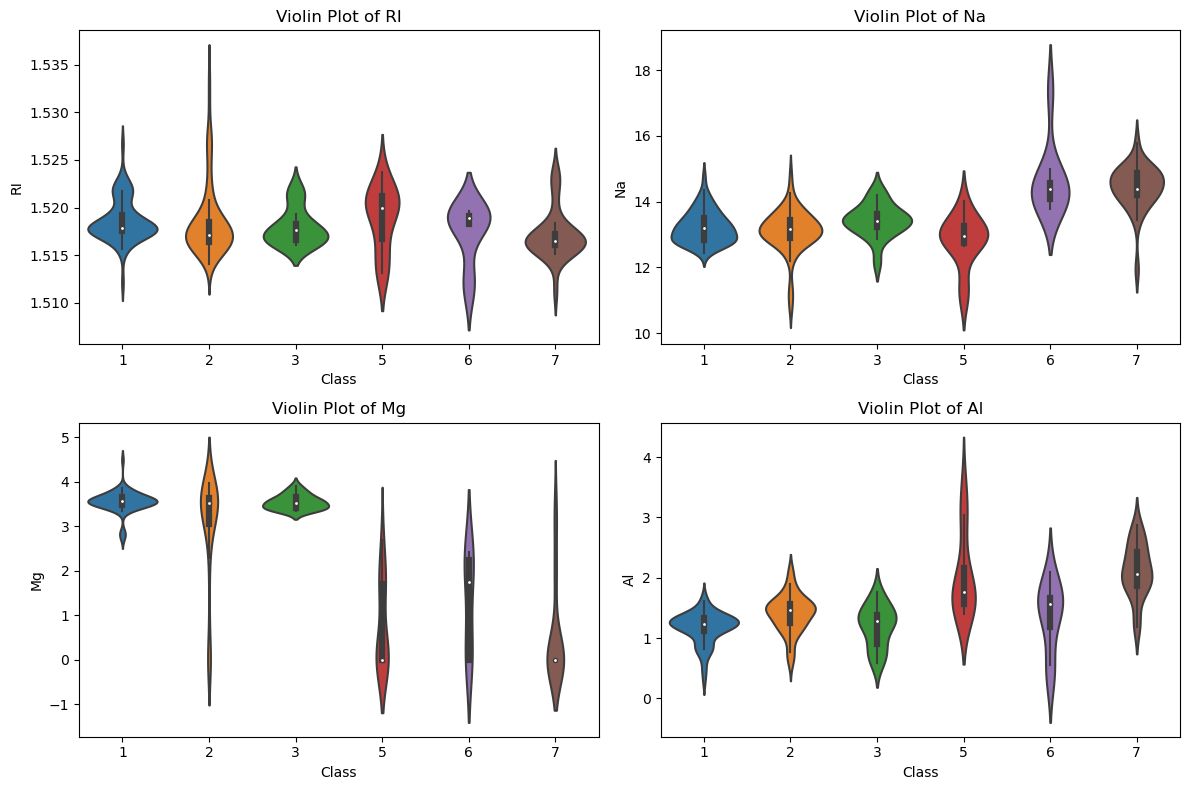

In [12]:
plt.figure(figsize=(12, 8))
features_to_plot = ['RI', 'Na', 'Mg', 'Al']
for i, feature in enumerate(features_to_plot, start=1):
    plt.subplot(2, 2, i)
    sns.violinplot(x="Class", y=feature, data=df)
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()

## Checking the skewness of the data

#### It gives information about the asymmetry of the data
#### Useful to check for possible outliers and how they change the distribution

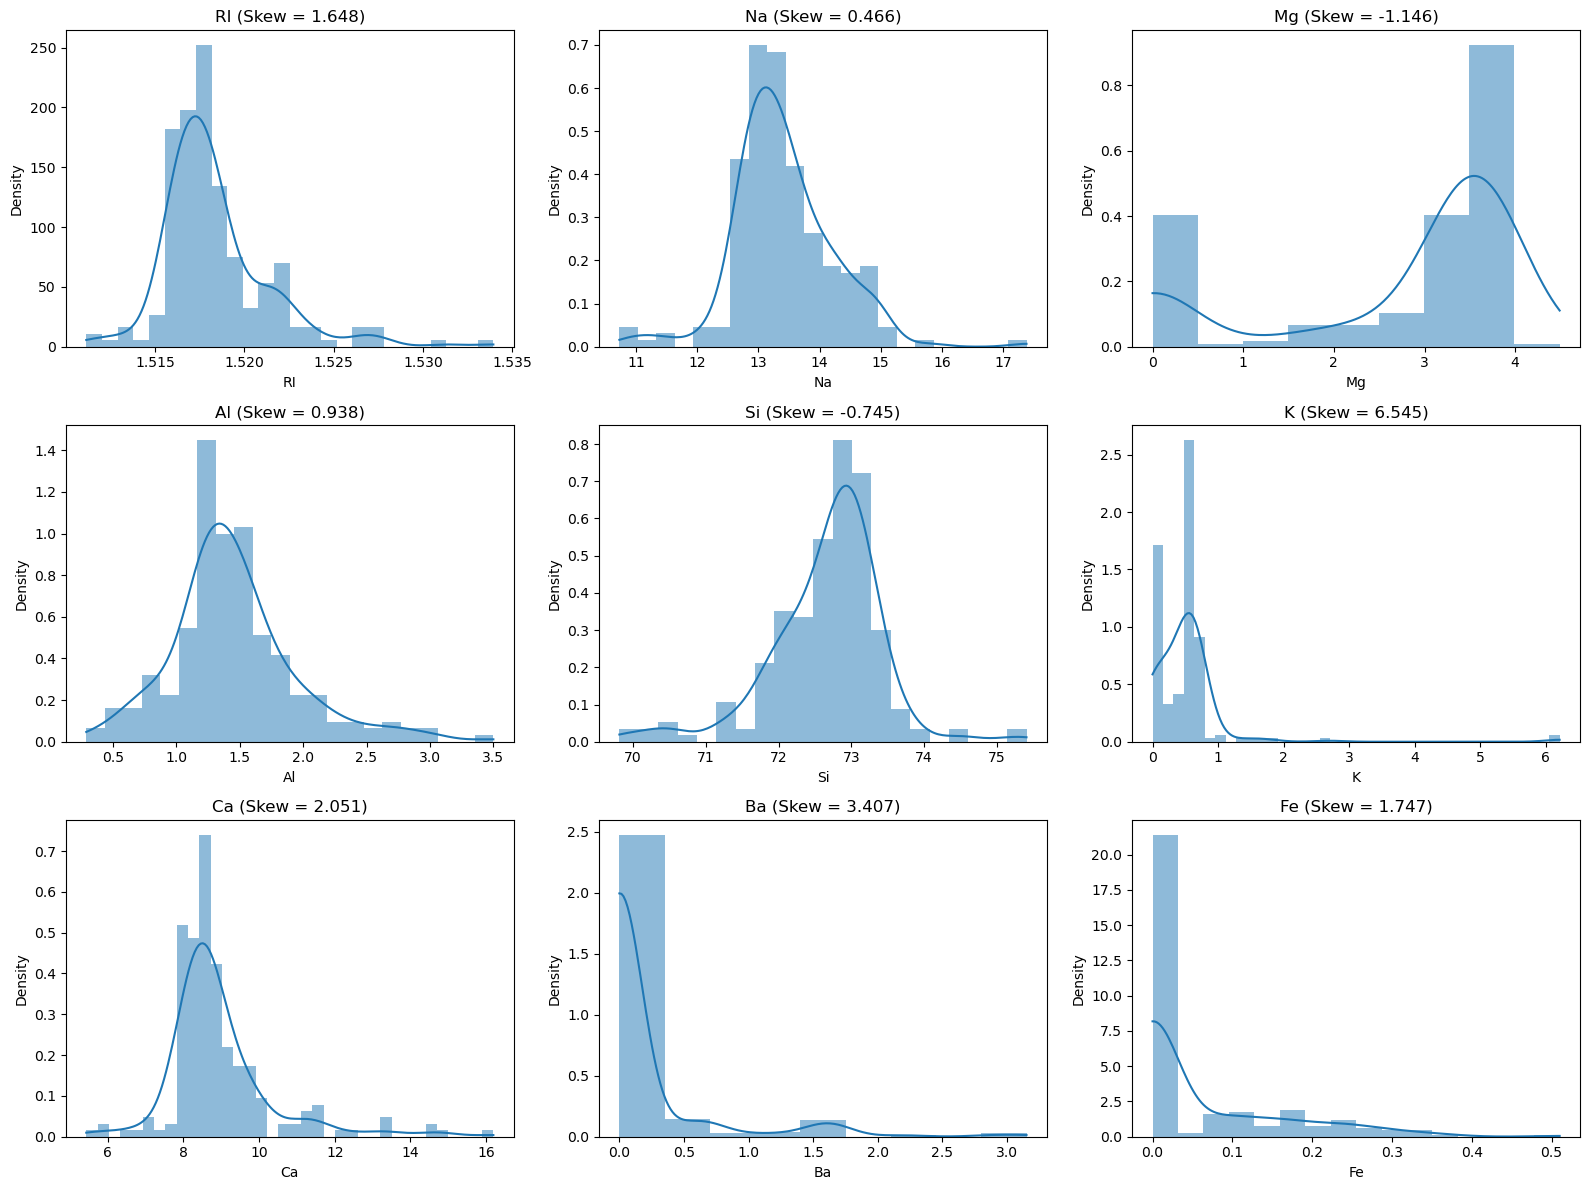

In [13]:
cols = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
fig, ax = plt.subplots(3, 3, figsize=(16, 12))
ax = ax.flatten()
for i, col in enumerate(cols):
    skew = df[col].skew()
    sns.histplot(df[col], ax=ax[i], kde=True, stat="density", linewidth=0)
    ax[i].set_title(f'{col} (Skew = {skew:.3f})')
plt.tight_layout()
plt.show()

## Correlation plot to check which features have a strong correlation between them

#### We can improve the model by removing redundant information by taking off correlated features

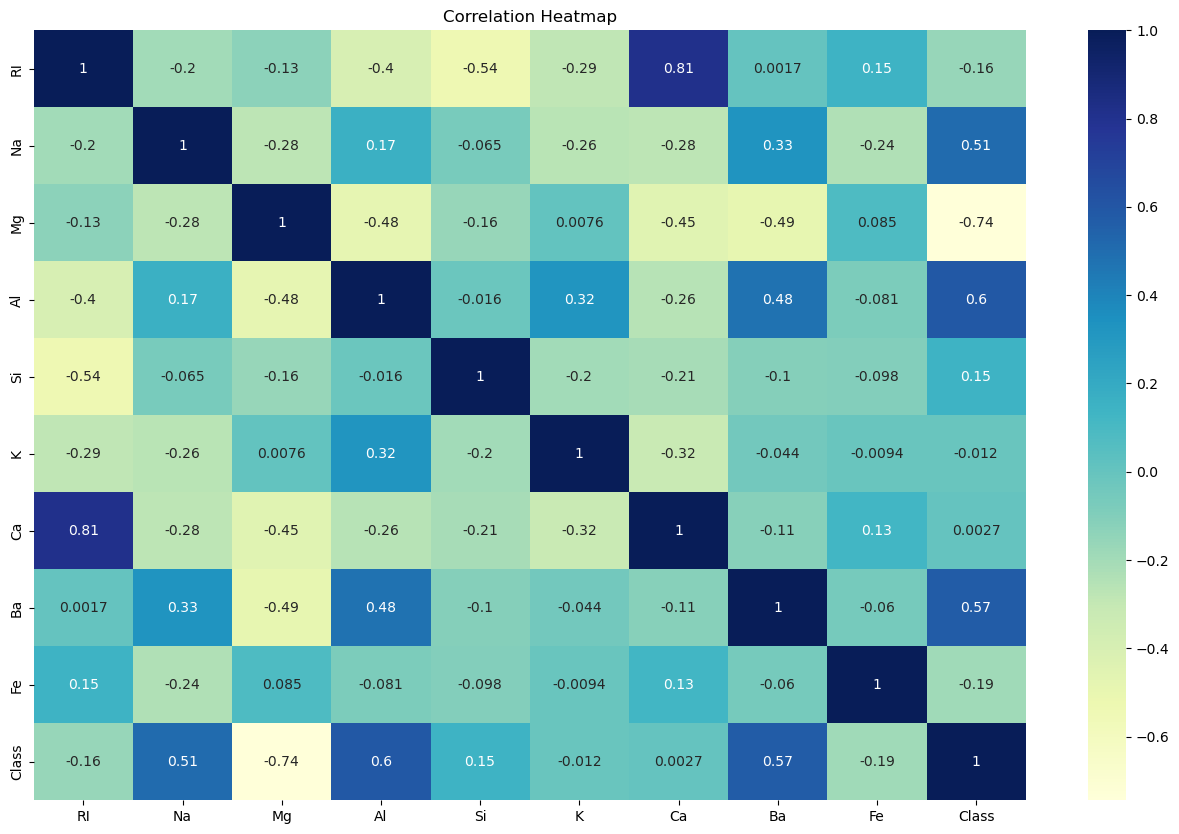

In [14]:
pd.options.display.float_format = '{:,.3f}'.format
plt.figure(figsize=(16, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()